In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from keras.models import load_model


2023-03-08 08:55:24.587030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Evaluating the model on the test set

In [ ]:
model = load_model('training_output/v1_final/final_model.h5')


In [2]:
weights_dir = 'training_output/v1_final/checkpoints/epoch_ 1_val_loss_ 13.70'
model = load_model(weights_dir)

2023-03-08 08:55:34.669718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 08:55:35.070452: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4646 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5


In [5]:
# Estimated time: 1.5 min
data = tf.keras.utils.image_dataset_from_directory(
    '/coding-drive/DATASETS/face-recognition-tensorflow-test-data/', 
    batch_size=8,
    image_size=(224, 224),
    color_mode='grayscale',
    shuffle=True,
    )

Found 139181 files belonging to 3 classes.


In [6]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
data_itr = data.as_numpy_iterator()

1/1 [==============================] - 0s 14ms/step
Predicted: 2 Actual: 2
1/1 [==============================] - 0s 14ms/step
Predicted: 2 Actual: 2
1/1 [==============================] - 0s 14ms/step
Predicted: 1 Actual: 2
1/1 [==============================] - 0s 13ms/step
Predicted: 0 Actual: 2
1/1 [==============================] - 0s 13ms/step
Predicted: 2 Actual: 2
1/1 [==============================] - 0s 14ms/step
Predicted: 0 Actual: 2
1/1 [==============================] - 0s 15ms/step
Predicted: 1 Actual: 2
1/1 [==============================] - 0s 14ms/step
Predicted: 2 Actual: 2
Total wrong predictions: 4 out of 8


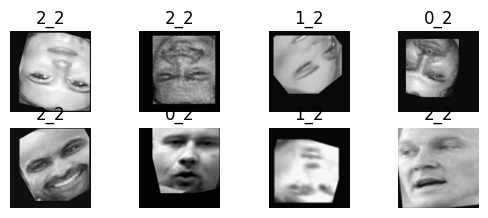

In [13]:
batch = data_itr.next()
count_wrong = 0
for i in range(8):
    pred = model.predict(batch[0][i].reshape(1, 224, 224, 1))[0].argmax()
    plt.subplot(4, 4, i+1)
    plt.imshow(batch[0][i].reshape(224, 224, 1), cmap='gray')
    plt.title(f'{pred}_{batch[1][i]}')
    plt.axis('off')
    print(f'Predicted: {pred} Actual: {batch[1][i]}')
    if pred != batch[1][i]:
        # print('Wrong prediction')
        count_wrong += 1
print(f'Total wrong predictions: {count_wrong} out of 8')
plt.show()


In [14]:
result = model.evaluate(data)

17398/17398 [==============================] - 222s 13ms/step - loss: 13.7014 - sparse_categorical_accuracy: 0.4806


## Testing by particular image

In [15]:
image = cv2.imread('data/devasheesh_0.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224, 224))
image = np.reshape(image, (1, 224, 224, 1))
image = image / 255.0
out = model.predict(image)
out.argmax()

1/1 [==============================] - 0s 16ms/step


0

In [ ]:
# %%timeit
# use haarcascade_frontalface_default.xml for frontal faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
def detect_face(img):
    # convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # detect faces
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    return faces

# detect_face(cv2.imread('data/img_with_2_faces.jpg'))

In [ ]:
img = cv2.imread('data/swarnim.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detect_face(img)
for face in faces:
    x, y, w, h = face
    # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (224, 224))
    face = face / 255.0
    # face.reshape(1, 224, 224, 1)
    face = np.reshape(face, (1, 224, 224, 1))
    print(face.shape)
    # plt.imshow(face, cmap='gray')
    # plt.show()
    result = model.predict(face)
    print(result)
# plt.imshow(img, cmap='gray')


## Benchmarking the model

In [ ]:
# Generate a random test dataset
test_data = np.random.rand(1000, 224, 224, 1)

# Get the current time
start_time = time.time()

# Make predictions for the entire test dataset
predictions = model.predict(test_data)

# Calculate the number of predictions per second
num_predictions_per_second = len(test_data) / (time.time() - start_time)

print(f"Number of predictions per second: {num_predictions_per_second}")